<a href="https://colab.research.google.com/github/pttrupt/KPMG-virtual-internship-/blob/main/KPMG_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

## Data Quality Assessment
######  Assessmentn of the data quality and completeness in preparation for analysis 

> Datasets contains four tables 
- Transactions 
- CustomerAddress 
- NewCustorList
- CustomerDemographic

###  Standard Data Qulaity Dimensions 

- Correct Values | Accuracy 
- Data Fields with Values | Completeness 
- Values Free from Contradiction | Consistency 
- Data Items with Value Meta-data | Relevancy 
- Data Containing Allowable Values | Validity 
- Records that are Duplicated | Uniqueness 



### Import libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use("fivethirtyeight")

### Read the Dataset

In [ ]:
data_file = pd.ExcelFile("KPMG_VI_New_raw_data_update_final.xlsx")

In [ ]:
trans = pd.read_excel(data_file, sheet_name=1, header=1)
c_list = pd.read_excel(data_file, sheet_name=2, header=1)
c_Demo = pd.read_excel(data_file, sheet_name=3, header=1)
c_Add = pd.read_excel(data_file, sheet_name=4, header=1)

### Transactions 

- 20,000 rows and 13 columns 
- Total 1,542 missing values in dataset
- 3494 unique customer_id 
- transaction in dataset from 2017-01-01 to 2017-12-31

In [ ]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [ ]:
trans.shape

(20000, 13)

In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [ ]:
trans.customer_id.value_counts()

2183    14
1068    14
2476    14
2072    13
1672    13
        ..
2395     1
1569     1
1203     1
2271     1
1544     1
Name: customer_id, Length: 3494, dtype: int64

In [ ]:
trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [ ]:
trans.transaction_date.sort_values()

516     2017-01-01
5876    2017-01-01
3459    2017-01-01
12484   2017-01-01
19130   2017-01-01
           ...    
605     2017-12-30
15269   2017-12-30
19906   2017-12-30
15756   2017-12-30
12003   2017-12-30
Name: transaction_date, Length: 20000, dtype: datetime64[ns]

In [ ]:
trans.duplicated().any()

False

In [ ]:
trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [ ]:
trans.product_class.value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [ ]:
trans.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [ ]:
trans.brand.value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [ ]:
trans.product_line.value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

### CustomerAddress 

- 3999 rows, 6 columns 
- no duplicated data 
- Inconsistent values for the same attribute in State columns

In [ ]:
c_Add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
c_Add.shape

(3999, 6)

In [ ]:
c_Add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
c_Add.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [ ]:
c_Add.duplicated("customer_id").any()

False

In [ ]:
c_Add.country.value_counts()

Australia    3999
Name: country, dtype: int64

In [ ]:
c_Add.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

### CustomerDemographic

- 4000 rows, 13 columns 
- 1763 missing values in dataset
- uncleared data into column `default`
- incorrect DOB's in dataset

In [ ]:
c_Demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
c_Demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
c_Demo.shape

(4000, 13)

In [ ]:
c_Demo.isnull().sum().sum()

1763

In [ ]:
c_Demo.duplicated("customer_id").any()

False

In [ ]:
c_Demo.owns_car.value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [ ]:
c_Demo.DOB.sort_values()

33     1843-12-21
719    1931-10-23
1091   1935-08-22
3409   1940-09-22
2412   1943-08-11
          ...    
3778          NaT
3882          NaT
3930          NaT
3934          NaT
3997          NaT
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [ ]:
c_Demo.wealth_segment.value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [ ]:
c_Demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [ ]:
c_Demo.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

### NewCustomerList

- 1000 rows, 23 columns 
- 317 missing values in dataset
- many customer has incorrect DOB 
- Duplicate columns `Unnamed:20` and  `Rank`


In [ ]:
c_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.54,0.675,0.84375,0.717187,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.93,0.930,1.16250,0.988125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.97,0.970,0.97000,0.970000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.92,1.150,1.15000,1.150000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,1.01,1.010,1.26250,1.262500,4,4,1.703125


In [ ]:
c_list.shape

(1000, 23)

In [ ]:
c_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
c_list.isnull().sum().sum()

317

In [ ]:
c_list.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.757900,0.849932,0.954978,0.882927,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.207673,0.249448,0.295538,0.285460,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.357000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.639375,0.702344,0.658125,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.770000,0.838750,0.937500,0.863281,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.940000,1.030000,1.164844,1.080000,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [ ]:
c_list.job_title.value_counts()

Associate Professor              15
Environmental Tech               14
Software Consultant              14
Chief Design Engineer            13
Senior Sales Associate           12
                                 ..
Human Resources Assistant III     1
Engineer II                       1
Computer Systems Analyst III      1
Human Resources Assistant IV      1
Web Developer II                  1
Name: job_title, Length: 184, dtype: int64

In [ ]:
c_list.job_industry_category.value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [ ]:
c_list.duplicated().any()

False

In [ ]:
gender_cat = c_list.gender.value_counts()

In [ ]:
c_list.country.value_counts()

Australia    1000
Name: country, dtype: int64

In [ ]:
c_list.DOB.sort_values().sample(10)

451   1991-12-02
942   1971-04-26
327   1982-02-10
135   1970-11-08
669   1974-10-12
562   1994-06-16
55    1981-02-03
329   1972-11-26
244   1950-09-05
748   1975-07-25
Name: DOB, dtype: datetime64[ns]

In [ ]:
postcode = np.sort(c_list.postcode.unique())

In [ ]:
c_list.owns_car.value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

# Task 2 

## Data Insights 
#### Targeting high values customers based on customer demographics and attributes.

> Three things to look after 
  - Data Exploration 
  - Model devlopment 
  - Interpretation 


#### Detailed Approach to completing the analysis 
- Understanding the data distribution 
- Feature engineering 
- Data transformation 
- Modelling 
- Result interpretation 
- Reporting 

### Clean the Data 

In [ ]:
c_Add.state = c_Add.state.str.replace("New South Wales", "NSW").replace("Victoria", "VIC")

In [ ]:
gender_dict = {'F':'Female', 'Femal':'Female', 'M':'Male'}
c_Demo.replace({"gender":gender_dict}, inplace=True )

In [ ]:
c_Demo.drop(columns=["default"], inplace=True)

In [ ]:
c_list.drop(columns=["Unnamed: 20"], inplace=True)

In [ ]:
c_Demo["Age"] = (pd.to_datetime("now") - c_Demo["DOB"]).astype("<m8[Y]")

In [ ]:
c_list["Age"] = (pd.to_datetime("now") - c_list["DOB"]).astype("<m8[Y]")

In [ ]:
c_Demo = c_Demo[c_Demo["Age"] < 85]

- Life expectancy at birth was 81.2 years for males and 85.3 years for females in 2018-20.


In [ ]:
def Age(num):

  if num > 0 and num <= 14:
    return "Children"
  elif num >= 15 and num <= 19:
    return "Youth"
  elif num >= 20 and num <= 64:
    return "Adults"
  else:
    return "Seniors"


In [ ]:
c_Demo["Age Category"] = c_Demo.Age.map(Age)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
c_list["Age Category"] = c_list.Age.map(Age)

### Dataset

In [ ]:
trans.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20


In [ ]:
c_Add.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [ ]:
c_Demo.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age Category
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,68.0,Seniors
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41.0,Adults
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,68.0,Seniors


In [ ]:
c_Demo.job_industry_category.unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [ ]:
c_Demo.deceased_indicator.value_counts()

N    3908
Y       2
Name: deceased_indicator, dtype: int64

In [ ]:
c_list.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Rank,Value,Age,Age Category
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.54,0.675,0.84375,0.717187,1,1.71875,64.0,Adults
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.93,0.930,1.16250,0.988125,1,1.71875,51.0,Adults
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.97,0.970,0.97000,0.970000,1,1.71875,47.0,Adults


### Merge Dataset

In [ ]:
merge_df = trans.merge(c_Demo, how='inner', on='customer_id').merge(c_Add, how='inner', on='customer_id')

In [ ]:
merge_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age Category,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,67.0,Seniors,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2003-02-07,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,67.0,Seniors,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,2010-11-05,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,67.0,Seniors,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,42.0,Adults,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2011-04-16,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,42.0,Adults,4 Shopko Circle,2196,NSW,Australia,5


### Insights 

In [ ]:
def percent_numb(plot, total_num, count=True, percent=False, l_r=0.1, u_d=50):

  for p in plot.patches:
    
    if count and percent:
      txt = str((p.get_height()*100 / total_num).round(2)) + '%' + " (" + str(p.get_height()) + ")"
    elif count and not percent:
      txt = str(p.get_height())
    else:
      txt = str((p.get_height()*100 / total_num).round(2)) + '%'

    txt_x = p.get_x()
    txt_y = p.get_height() 
    plot.text(txt_x+l_r ,txt_y+u_d, txt)
    

##### Does bike related purchases have relation with wealth segment columns?

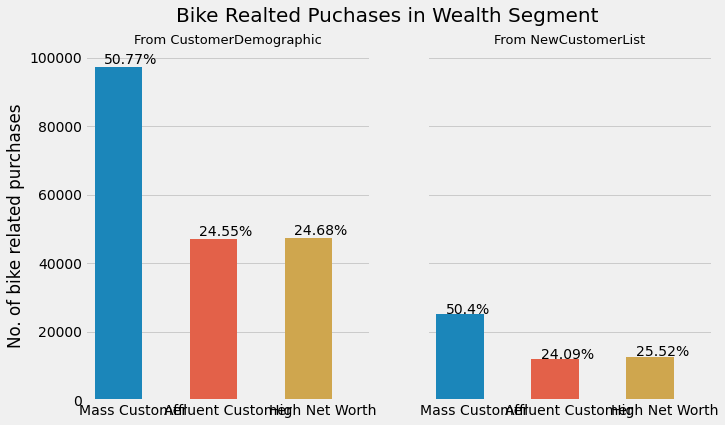

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(10,6), sharey=True)
plt.suptitle("Bike Realted Puchases in Wealth Segment", fontsize=20)
# fig[0].figure(figsize=(10,6))
g0 = sns.barplot(data=c_Demo, x='wealth_segment', y='past_3_years_bike_related_purchases', estimator=np.sum, ci=None, ax=ax[0])
g1 = sns.barplot(data=c_list, x='wealth_segment', y='past_3_years_bike_related_purchases', estimator=np.sum, ci=None, ax=ax[1])
ax[0].set_ylabel("No. of bike related purchases")
ax[1].set_ylabel(""),ax[1].set_xlabel(""), ax[0].set_xlabel("") 
ax[0].set_title("From CustomerDemographic", fontsize=13)
ax[1].set_title("From NewCustomerList", fontsize=13)

for p in zip(g0.patches, g1.patches):
    
    txt0 = str((p[0].get_height()*100/ np.sum(c_Demo.past_3_years_bike_related_purchases)).round(2)) + '%'
    txt1 = str((p[1].get_height()*100/ np.sum(c_list.past_3_years_bike_related_purchases)).round(2)) + '%'
    
    txt0_x = p[0].get_x()
    p[0].set_width(0.5) 
    txt0_y = p[0].get_height() 
    g0.text(txt0_x + 0.1 ,txt0_y + 1000,txt0)

    txt1_x = p[1].get_x()
    p[1].set_width(0.5) 
    txt1_y = p[1].get_height() 
    g1.text(txt1_x + 0.1 ,txt1_y + 100,txt1)

fig.savefig("Bike Related purchases")

##### around 50% of the old customers are Mass customer in terms of wealth segment.


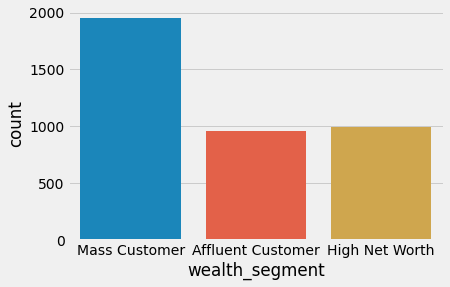

In [ ]:
sns.countplot(x='wealth_segment', data=c_Demo)

##### categories the customers by job industries 

In [ ]:
job_industries = c_Demo.job_industry_category.value_counts().sort_values(ascending=False)

In [ ]:
order = ['Manufacturing', 'Financial Services', 'Health', 'Retail', 'Property',
       'IT', 'Entertainment', 'Argiculture', 'Telecommunications']

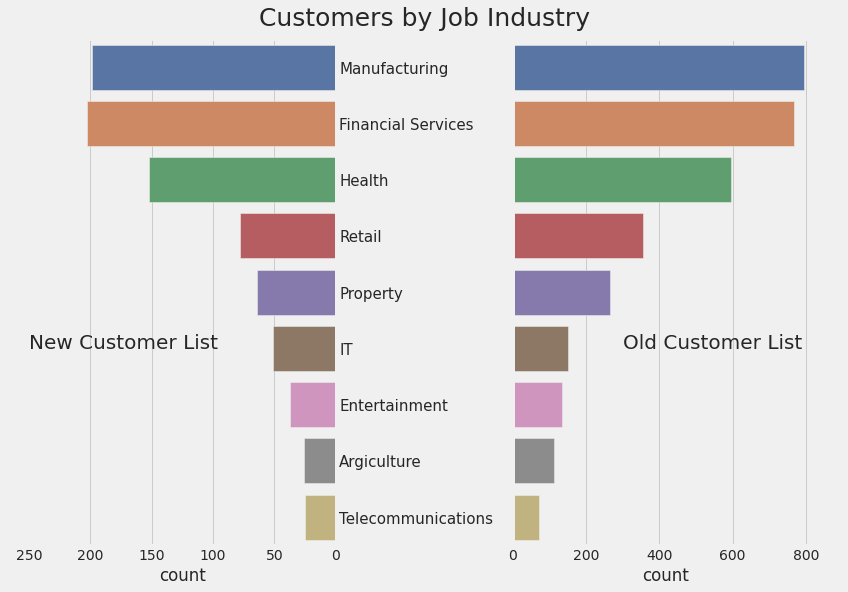

In [ ]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(12,8), squeeze=True)
sns.countplot(y='job_industry_category', data=c_list, palette='deep', ax=ax[0], order=order)
sns.countplot(y='job_industry_category', data=c_Demo, palette='deep', ax=ax[1], order=order)
plt.suptitle("Customers by Job Industry", fontsize=25, y=1.03)

ax[0].yaxis.tick_right()
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_xlim(250, 0)
ax[0].text(250, 5, "New Customer List", fontsize=20)
ax[0].set_ylabel(" ")

ax[1].yaxis.set_label_position("right")
ax[1].text(300, 5, "Old Customer List", fontsize=20)
ax[1].set_ylabel(" ")

plt.tight_layout()
plt.savefig("Customers by Job Industry.png", bbox_inches='tight')

plt.show()

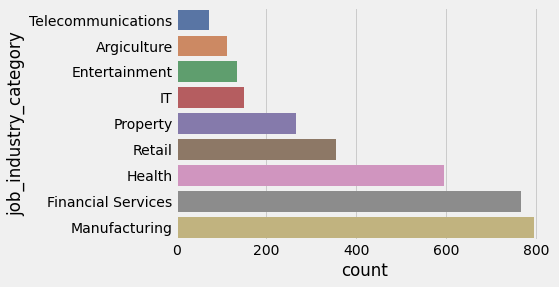

In [ ]:
sns.countplot(y='job_industry_category', data=c_Demo, palette='deep', order=job_industries.index[::-1])

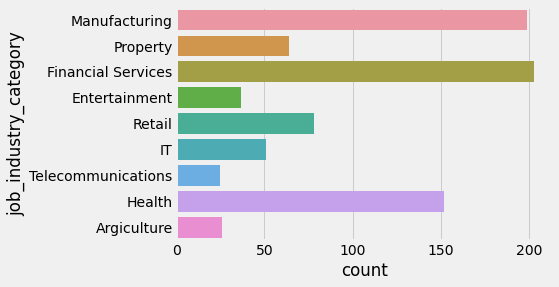

In [ ]:
sns.countplot(y='job_industry_category', data=c_list)

##### Around 90% (10,000) times transcations happend by adults(Age 20-64)

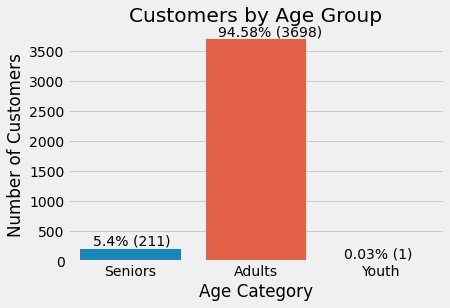

In [ ]:
age_demo = sns.countplot(x='Age Category', data=c_Demo)
plt.title("Customers by Age Group", )
plt.ylabel("Number of Customers")

percent_numb(age_demo, len(c_Demo), count=True, percent=True, l_r=0.1, u_d=50)

plt.savefig("Number of Customers by Age Group", bbox_inches='tight')

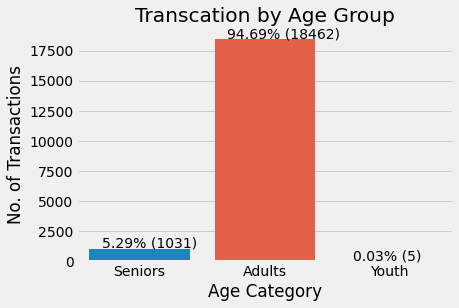

In [ ]:
age = sns.countplot(x='Age Category', data=merge_df)
plt.ylabel("No. of Transactions")
plt.title("Transcation by Age Group")

percent_numb(age, len(merge_df), count=True, percent=True, l_r=0.1, u_d=100)

plt.savefig("Transaction by Age Group", bbox_inches='tight')

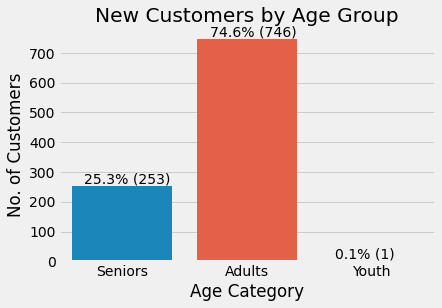

In [ ]:
age = sns.countplot(x='Age Category', data=c_list, order=["Seniors", "Adults", "Youth"])
plt.ylabel("No. of Customers")
plt.title("New Customers by Age Group")

percent_numb(age, len(c_list), count=True, percent=True, l_r=0.1, u_d=10)

plt.savefig("New Customers by Age Group", bbox_inches='tight')

##### old customer demographics shows that more than 50 % customers are from state NSW.


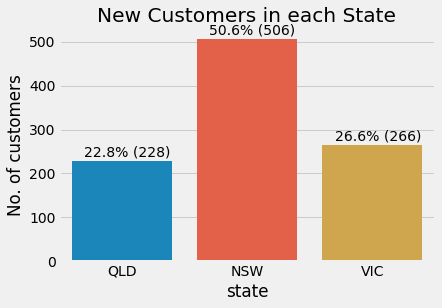

In [ ]:
state = sns.countplot(x='state', data=c_list)
plt.title("New Customers in each State")
plt.ylabel("No. of customers")

percent_numb(state, len(c_list), count=True, percent=True, l_r=0.1, u_d=10)
plt.savefig("New Customers in each State", bbox_inches='tight')

In [ ]:
new_c_Demo = c_Demo.merge(c_Add, how='inner', on='customer_id')

In [ ]:
new_c_Demo.shape

(3906, 19)

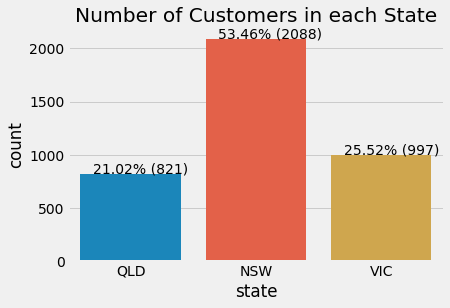

In [ ]:
old_state = sns.countplot(x="state", data=new_c_Demo, order=["QLD", "NSW", "VIC"])
plt.title("Number of Customers in each State")
percent_numb(old_state, len(new_c_Demo), count=True, percent=True, l_r=0.1, u_d=10)
plt.savefig("Customers in each State", bbox_inches='tight')

### Take outs 

1. Find the Age distribution in older dataset and new customer list 

